In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('tennis.csv')

In [3]:
df

,Outlook,humidity,Windy,play
0,Sunny,high,weak,no
1,Sunny,high,strong,no
2,Overcast,high,weak,yes
3,rainy,high,weak,yes
4,rainy,normal,weak,yes
5,rainy,normal,strong,no
6,Overcast,normal,weak,yes
7,Sunny,high,weak,no
8,Sunny,normal,weak,yes
9,rainy,normal,weak,yes


In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
Outlook=LabelEncoder()
humidity=LabelEncoder()	
Windy=LabelEncoder()	
play=LabelEncoder()

In [6]:
df['Outlook']=Outlook.fit_transform(df['Outlook'])
df['humidity']=humidity.fit_transform(df['humidity'])
df['Windy']=Windy.fit_transform(df['Windy'])
df['play']=play.fit_transform(df['play'])

In [7]:
df

,Outlook,humidity,Windy,play
0,1,0,1,0
1,1,0,0,0
2,0,0,1,1
3,2,0,1,1
4,2,1,1,1
5,2,1,0,0
6,0,1,1,1
7,1,0,1,0
8,1,1,1,1
9,2,1,1,1


In [20]:
features_cols=['Outlook','humidity','Windy']
x=df[features_cols]
y=df.play

In [22]:
x

,Outlook,humidity,Windy
0,1,0,1
1,1,0,0
2,0,0,1
3,2,0,1
4,2,1,1
5,2,1,0
6,0,1,1
7,1,0,1
8,1,1,1
9,2,1,1


In [24]:
y

0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    0
Name: play, dtype: int32

In [26]:
from sklearn.model_selection import train_test_split

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [30]:
from sklearn.tree import DecisionTreeClassifier

In [51]:
classifier=DecisionTreeClassifier(criterion='entropy',)

In [53]:
classifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [55]:
classifier.predict(x_test)

array([1, 1, 0])

In [57]:
x_test #outlook[sunny 2.overcast 0, rainy 1]

,Outlook,humidity,Windy
6,0,1,1
12,0,1,1
1,1,0,0


In [59]:
classifier.score(x_test,y_test)

1.0

[Text(0.4, 0.9, 'x[0] <= 0.5\nentropy = 0.946\nsamples = 11\nvalue = [4, 7]'),
 Text(0.3, 0.7, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.35, 0.8, 'True  '),
 Text(0.5, 0.7, 'x[1] <= 0.5\nentropy = 0.991\nsamples = 9\nvalue = [4, 5]'),
 Text(0.45, 0.8, '  False'),
 Text(0.2, 0.5, 'x[0] <= 1.5\nentropy = 0.811\nsamples = 4\nvalue = [3, 1]'),
 Text(0.1, 0.3, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.3, 0.3, 'x[2] <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.2, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.4, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8, 0.5, 'x[2] <= 0.5\nentropy = 0.722\nsamples = 5\nvalue = [1, 4]'),
 Text(0.7, 0.3, 'x[0] <= 1.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.6, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.9, 0.3, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]')]

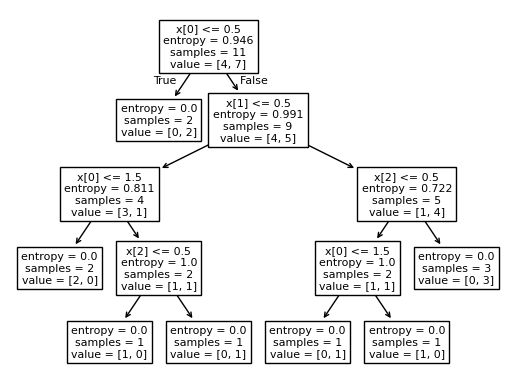

In [61]:
from sklearn import tree 
tree.plot_tree(classifier)